### DRIVE ENV SETUP

In [ ]:
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### import libs

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os
import time

In [ ]:
import warnings
warnings.filterwarnings(action="ignore")

In [ ]:
from sklearn.model_selection import train_test_split

### read data
Dataset: [https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews](https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews)

In [ ]:
csv_file_path = "/content/drive/MyDrive/project_dsc540/data/IMDB_reviews_dataset.csv"

In [ ]:
# read data
raw_movies = pd.read_csv(csv_file_path)

# EDA

In [ ]:
raw_movies.shape

(50000, 2)

In [ ]:
raw_movies.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
raw_movies.isna().sum()

review       0
sentiment    0
dtype: int64

In [ ]:
raw_movies.dtypes

review       object
sentiment    object
dtype: object

Text(0.5, 1.0, 'Distribution of sentiment')

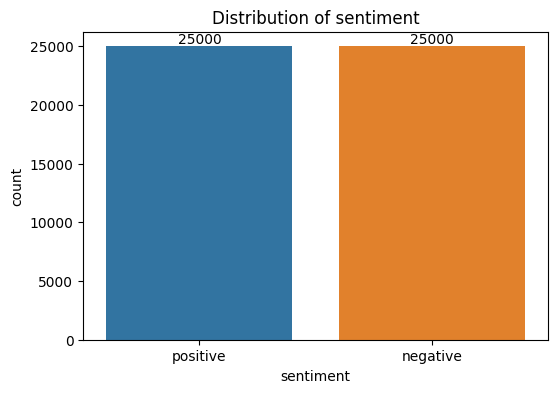

In [ ]:
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='sentiment', data=raw_movies)
for container in ax.containers:
  ax.bar_label(container)
plt.title("Distribution of sentiment")

# Text cleaning

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import re
import nltk
from nltk.corpus import stopwords
from nltk import bigrams
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from wordcloud import WordCloud

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
raw_movies.head(2)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive


In [ ]:
text_cleaned = raw_movies.copy()

In [ ]:
text_cleaned['clean_review'] = raw_movies.review.str.lower()

Text(0.5, 1.0, 'Distribution of review length')

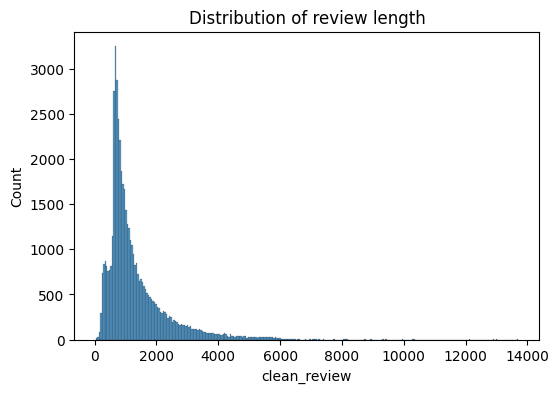

In [ ]:
plt.figure(figsize=(6, 4))
sns.histplot(text_cleaned.clean_review.apply(lambda x:len(x)))
plt.title("Distribution of review length")

<Axes: title={'center': 'Top 20 Frequent Number Of Words'}>

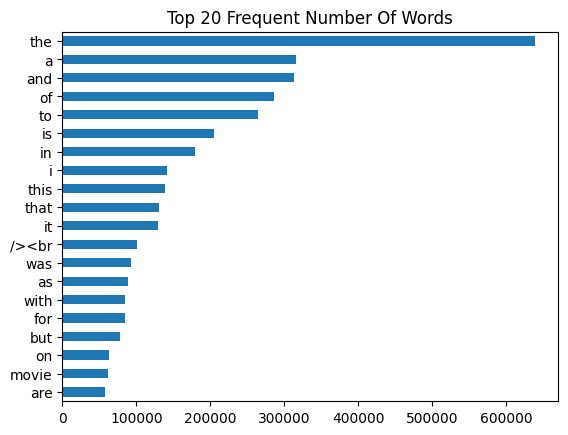

In [ ]:
most_freq_words = pd.Series(" ".join(text_cleaned['clean_review']).split()).value_counts()
most_freq_words.head(20).sort_values(ascending = True).plot(kind="barh",title = "Top 20 Frequent Number Of Words")

In [ ]:
# remove stopwords
nltk.download('stopwords')
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
stop_words += stop_words + ['br']

In [ ]:
# tokenize data
tokenized_doc = text_cleaned['clean_review'].apply(lambda x: x.split())

In [ ]:
tokenized_doc.head()

0    [one, of, the, other, reviewers, has, mentione...
1    [a, wonderful, little, production., <br, /><br...
2    [i, thought, this, was, a, wonderful, way, to,...
3    [basically, there's, a, family, where, a, litt...
4    [petter, mattei's, "love, in, the, time, of, m...
Name: clean_review, dtype: object

In [ ]:
len(tokenized_doc)

50000

In [ ]:
# remove stop-words
tokenized_doc = tokenized_doc.apply(lambda x: [item for item in x if item not in stop_words])

In [ ]:
text_cleaned['clean_review'] = tokenized_doc.astype(str).str.replace('\[|\]|\'', '')
text_cleaned['clean_review'] = text_cleaned.clean_review.str.replace(",",'')
text_cleaned['clean_review'] = text_cleaned['clean_review'].str.replace(r'\d+','')
text_cleaned['clean_review'] = text_cleaned['clean_review'].str.replace(r'[^\w\s]', '')

In [ ]:
def top_n_words(text, n):
  most_freq_words = pd.Series(" ".join(text).split()).value_counts()
  return most_freq_words.head(n).sort_values(ascending = True).plot(kind="barh",title = "Top {n} Frequent Number Of Words".format(n = n))

In [ ]:
text_cleaned.head()

,review,sentiment,clean_review
0,One of the other reviewers has mentioned that ...,positive,one reviewers mentioned watching oz episode h...
1,A wonderful little production. <br /><br />The...,positive,wonderful little production br br the filming ...
2,I thought this was a wonderful way to spend ti...,positive,thought wonderful way spend time hot summer we...
3,Basically there's a family where a little boy ...,negative,basically theres family little boy jake thinks...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter matteis love time money visually stunni...


<Axes: title={'center': 'Top 15 Frequent Number Of Words'}>

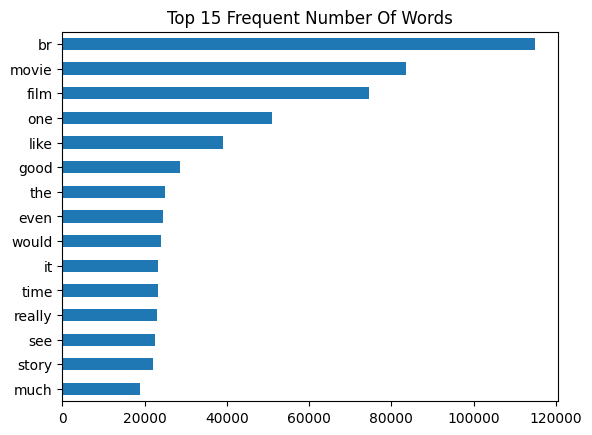

In [ ]:
top_n_words(text_cleaned['clean_review'], 15)

In [ ]:
text_cleaned.head()

,review,sentiment,clean_review
0,One of the other reviewers has mentioned that ...,positive,one reviewers mentioned watching oz episode h...
1,A wonderful little production. <br /><br />The...,positive,wonderful little production br br the filming ...
2,I thought this was a wonderful way to spend ti...,positive,thought wonderful way spend time hot summer we...
3,Basically there's a family where a little boy ...,negative,basically theres family little boy jake thinks...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter matteis love time money visually stunni...


In [ ]:
# wordcloud of sample data
X = text_cleaned.drop('sentiment', axis=1)  # Assuming 'category' is the target variable
y = text_cleaned['sentiment']

In [ ]:
sample_df, _, sample_y, _ = train_test_split(X, y, test_size=0.5, random_state=42, stratify=y)

In [ ]:
sample_df['sentiment'] = sample_y

In [ ]:
sample_df.drop('review', axis=1)

,clean_review,sentiment
3055,trios vignettes insightful quite enjoyable cur...,positive
47326,never heard one owner local dvd rental outlet ...,negative
48869,excellent hard find trippy world war spy thril...,positive
48623,huge fan big loud trashy completely stupid act...,positive
39657,easily lucio fulcis respected film dont tortur...,positive
...,...,...
21552,recent years seen number biopics famous singer...,positive
10610,may say yourself don johnson elvis work possib...,negative
20104,title refers questionable poker hand six comic...,positive
35597,far pathetic movie indian cinema cinema come w...,negative


In [ ]:
# get text of two categories
positive_text = ' '.join(sample_df[sample_df.sentiment=='positive']['clean_review'])
negative_text = ' '.join(sample_df[sample_df.sentiment=='negative']['clean_review'])

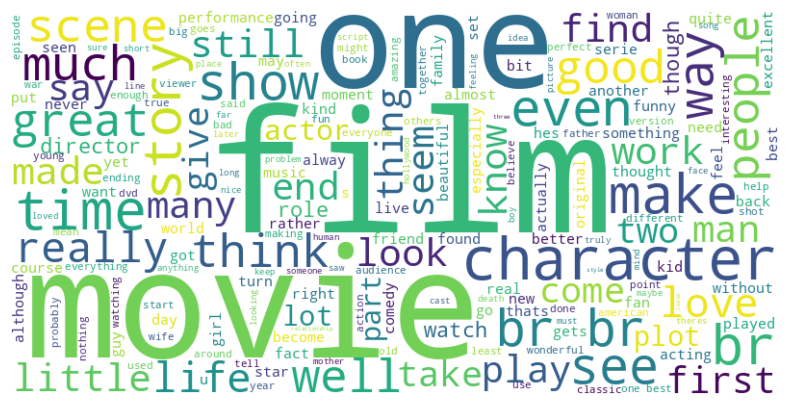

In [ ]:
# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

# Plot the WordCloud image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()

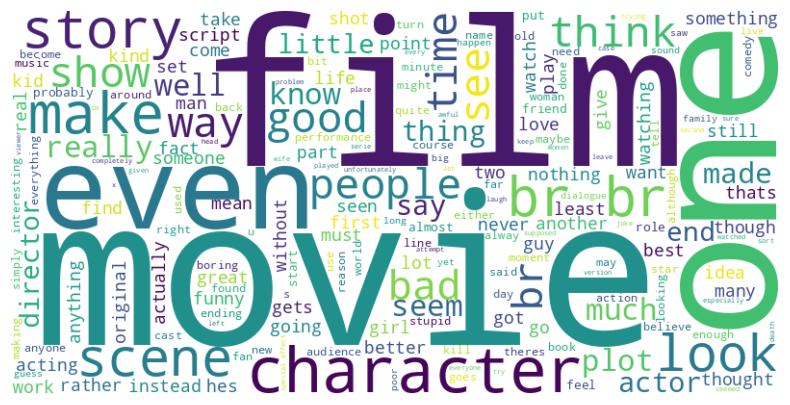

In [ ]:
# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

# Plot the WordCloud image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()